# Analyzing eBay Car Listings

The focus of this project will be to clean and analyze car listing data from *eBay Kleinanzeigen*. The dataset which will be used was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). A total of 50,000 data points were sampled from the dataset. The goal will be to determine the average prices of popular car brands, and see if there is any correlation to average mileage by brand.

In [1]:
import pandas as pd
import numpy as np

autos = pd.read_csv('autos.csv',encoding = 'Latin-1')

In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In examining the dataset, it appears that a few columns (`vehicleType`, `gearbox`, `model`, `fuelType`, `notRepairedDamage`) have missing values since we expect 50,000 total data points to have been provided. The dataframe is a mix of integer and string datatypes. Since the price column data is represented as strings, it may be useful to convert this column to a numerical data type.

The case of column names is also inconsistent. We will fix this by converting column names to snake_case for consistency.

In [4]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [5]:
# Rename columns
nameMap = {'dateCrawled':'date_crawled', 'name':'name', 'seller':'seller', 'offerType':'offer_type', 'price':'price', 'abtest':'abtest',
       'vehicleType':'vehicle_type', 'yearOfRegistration':'registration_year', 'gearbox':'gearbox', 'powerPS':'power_ps', 'model':'model',
       'odometer':'odometer', 'monthOfRegistration':'registration_month', 'fuelType':'fuel_type', 'brand':'brand',
       'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 'nrOfPictures':'nr_of_pictures', 'postalCode':'postal_code',
       'lastSeen':'last_seen'}

autos.rename(mapper=nameMap, axis=1, inplace=True)

In [6]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Next we will perform some more data exploration to determine what other cleaning tasks need to be completed.

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


The columns `seller` and `offer_type` have mostly one value, so the columns can be dropped. The `price` and `odometer` columns are numeric data currently represented as text.

In [8]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

None of the ads in the `nr_of_pictures` column have any pictures, so this is also a good candidate to be dropped.

In [9]:
# Convert price and odometer columns to numeric values
autos['price'] = autos['price'].str.strip().str.replace('$','').str.replace(',','').astype(int)
autos['odometer'] = autos['odometer'].str.strip().str.replace('km','').str.replace(',','').astype(int)

# Rename odometer column
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)

Next, we will investigate outliers in the `price` and `odometer_km` columns.

In [10]:
autos['price'].unique().shape

(2357,)

In [11]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [12]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [13]:
autos['price'].value_counts().sort_index(ascending=True).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

Some outliers in the price data that we might consider removing are those beyond $350000. We should also consider removing the 1421 ads priced at zero since this is only a small percentage of the 50000 data points in the dataset.

In [14]:
autos = autos[autos['price'].between(1,350001)]

In [15]:
autos['odometer_km'].unique().shape

(13,)

In [16]:
autos['odometer_km'].describe()

count     48565.000000
mean     125770.101925
std       39788.636804
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [17]:
autos['odometer_km'].value_counts().sort_index(ascending=True)

5000        836
10000       253
20000       762
30000       780
40000       815
50000      1012
60000      1155
70000      1217
80000      1415
90000      1734
100000     2115
125000     5057
150000    31414
Name: odometer_km, dtype: int64

There don't seem to be any notable outliers in the `odometer_km` column. Since there are only 13 unique values, the rounded odometer values are probably user-selected from predefined options from the eBay website.

## Exploring Date Columns

The `date_crawled`, `ad_created`, and `last_seen` columns will now be explored.

In [18]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

It seems the site was crawled over roughly a month period (March 2016). The distribution of ad dates seem to be roughly uniform over this month.

In [19]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

A few of the ads are quite old (up to 9 months), however most of the ads fall within the crawling period.

In [20]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The last three days crawled indicate a spike in when the ads were last seen. Since this spike is abnormal relative to the rest of the month, it is unlikely that it corresponds to observed car sales in these last few days.

In [21]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

There appears to be some odd year values in the `registration_year` column since a maximum year of 9999, and a minimum year of 1000 are observed. These values are outliers and make no sense.

In [22]:
autos['registration_year'].value_counts().sort_index().head(20)

1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    3
1951    2
1952    1
1953    1
1954    2
Name: registration_year, dtype: int64

Since a very small number of listed car registration years are <1900 and there is a big gap in years, these are likely outliers that can be removed. Additionally, any vehicle with a registration year above 2016 is inaccurate since cars can't be registered after the listing was seen.

In [23]:
# Remove outlier registration years
autos = autos[autos['registration_year'].between(1900,2016)]

In [24]:
autos['registration_year'].value_counts(normalize=True).head(20)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
2008    0.047450
2009    0.044665
1997    0.041794
2011    0.034768
2010    0.034040
1996    0.029412
2012    0.028063
1995    0.026285
2016    0.026135
2013    0.017202
Name: registration_year, dtype: float64

Now most of the ads have been registered within the last two decades, which seems to be reasonable for this dataset.

## Exploring Brands by Price

Next, we will explore the average price of the most popular 15 brands present in our dataset to identify any trends.

In [25]:
popBrands = autos['brand'].value_counts().head(15).index

In [26]:
brandPriceData = {}
for b in popBrands:
    brandPrices = autos.loc[autos['brand'] == b,'price']
    brandPriceData[b] = int(brandPrices.mean())

In [27]:
avgBrandPrices = pd.Series(brandPriceData)
df = pd.DataFrame(avgBrandPrices, columns=['Mean Price']).sort_values(by=['Mean Price'],ascending=False)
df

,Mean Price
audi,9336
mercedes_benz,8628
bmw,8332
skoda,6368
volkswagen,5402
nissan,4743
seat,4397
mazda,4112
citroen,3779
ford,3749


Based on our analysis it appears that German luxury car brands such as Audi, Mercedes Benz, and BMW tend to be priced the highest on eBay during the crawling period. This makes sense since luxury cars are usually worth more than standard commercial brands like Mazda, or Ford.

## Exploring Brands by Mileage

We will explore the average mileage of the same 15 most popular brands. This will allow for ease of comparison between the average price and the average mileage of car brands.

In [28]:
brandMileData = {}
for b in popBrands:
    brandMiles = autos.loc[autos['brand'] == b,'odometer_km']
    brandMileData[b] = int(brandMiles.mean())

In [29]:
brandMileData_series = pd.Series(brandMileData)
df['Mean Mileage'] = brandMileData_series

In [30]:
df

,Mean Price,Mean Mileage
audi,9336,129157
mercedes_benz,8628,130788
bmw,8332,132572
skoda,6368,110848
volkswagen,5402,128707
nissan,4743,118330
seat,4397,121131
mazda,4112,124464
citroen,3779,119694
ford,3749,124266


In [31]:
df.describe()

,Mean Price,Mean Mileage
count,15.000000,15.000000
mean,4918.800000,122729.200000
std,2239.055611,8811.935722
min,2474.000000,99326.000000
25%,3337.000000,119012.000000
50%,4112.000000,124464.000000
75%,5885.000000,128932.000000
max,9336.000000,132572.000000


Based on the standard deviations, brand mileage varies much more than price data by brand. More expensive vehicles appear to have slightly higher mileage compared to cheaper vehicles. This could be due to car owners taking better care of their luxury vehicles, or the fact that luxury vehicles are fabricated with better quality components, thus extending the lifetime of the vehicle.

A barplot can be generated to see if there is any correlation with regards to listed prices and mileage by car brand.

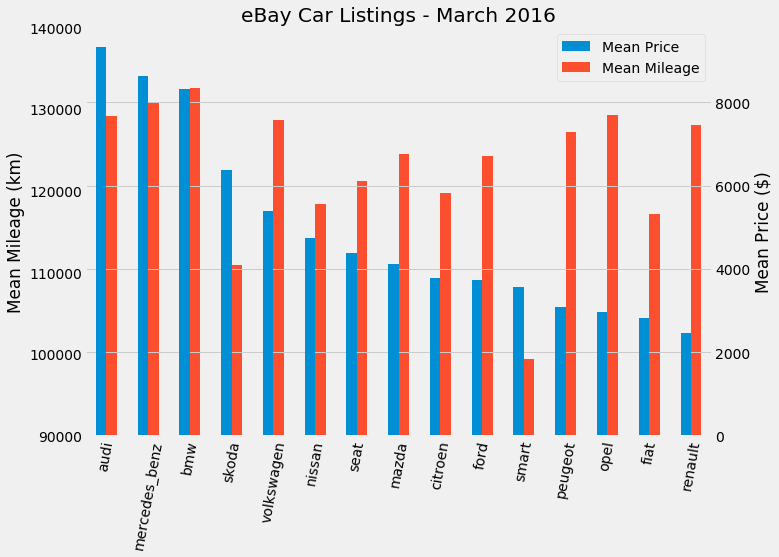

In [32]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')

ax = df.plot(kind= 'bar', secondary_y= 'Mean Price', rot= 80, figsize=(10,7), ylim=(90000, 140000), mark_right=False)
ax.set_ylabel('Mean Mileage (km)')
ax.right_ax.set_ylabel('Mean Price ($)')
ax.set_title('eBay Car Listings - March 2016')
plt.show()

In [33]:
# Pearson correlation between mean price & mean mileage - Luxury German Cars
df.loc[['audi','mercedes_benz','bmw'], :].corr()

,Mean Price,Mean Mileage
Mean Price,1.000000,-0.966777
Mean Mileage,-0.966777,1.000000


In [34]:
# Pearson correlation between mean price & mean mileage - Non-Luxury Cars
df.iloc[3:, :].corr()

,Mean Price,Mean Mileage
Mean Price,1.000000,-0.244942
Mean Mileage,-0.244942,1.000000


Considering only the top priced German car brands (Audi, Mercedes Benz, BMW), it seems that their listed values decrease with regards to higher mileages. This is inline with intuition since a similar vehicle with higher mileage would mean the car was used more, thus resulting in a lower listing price. This inverse correlation is confirmed by large negative Pearson coefficient (p = -0.97).

The remaining vehicles on the list have no clear trend with regards to their listed price and their mileage. The Pearson coefficient (p = -0.24) suggests a very weak negative correlation between price and mileage. This lack of correlation could be due to sellers having differing opinions on the relative value of different non-luxury car brands. Also, other factors other than mileage likely have an effect on the pricing of cars.

## Conclusion

The dataset analyzed in this project was eBay car sale data scraped during March 2016. During data cleaning we found that a few columns did not contain many unique values, and some columns were not encoded as numeric. Additionally, a small portion of the data had faulty inputs from sellers on eBay, so the data was dropped accordingly to improve the accuracy of our analysis.

The direction chosen for exploration was an analysis of the average price and average mileage of the 15 most popular car brands in the dataset. It was determined that German luxury car brands tended to be priced the highest, with their prices decreasing with higher mileages. The remaining non-luxury, popular car brands displayed no definitive trend with regards to a correlation between price and mileage alone.